In [1]:
import sys
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)
print("Matplotlib version: ", ml.__version__)

Python version:  3.5.1 |Anaconda 2.5.0 (64-bit)| (default, Dec  7 2015, 11:16:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas version:  0.17.1
Matplotlib version:  1.5.1


# Airbnb Data

First we read in the data

In [3]:
url1 = "http://data.insideairbnb.com/united-states/"
url2 = "ny/new-york-city/2016-02-02/data/listings.csv.gz"
full_df = pd.read_csv(url1+url2, compression="gzip")
full_df[["id", "last_scraped", "name", "description", "number_of_reviews", "price", "review_scores_rating"]].head(3)

/home/chase/Programming/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,last_scraped,name,description,number_of_reviews,price,review_scores_rating
0,6627449,2016-02-02,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,8,$125.00,93
1,7949480,2016-02-02,City Island Sanctuary Sunny BR & BA,Sunny relaxing room w/ adjacent pvt. bath in a...,1,$68.00,100
2,1886820,2016-02-02,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,0,$300.00,NaN


We don't want all data, so let's focus on a few variables.

In [4]:
full_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [5]:
full_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
df = full_df[["id", "price", "number_of_reviews", "review_scores_rating", "bedrooms", "city", "neighbourhood"]]

df.tail(10)

,id,price,number_of_reviews,review_scores_rating,bedrooms,city,neighbourhood
35947,10721609,$329.00,0,NaN,2,Brooklyn,Greenpoint
35948,10388585,$43.00,0,NaN,1,Brooklyn,Prospect Heights
35949,10036117,$350.00,1,100,2,New York,Midtown
35950,10926997,$95.00,0,NaN,0,Queens,Long Island City
35951,7400810,$70.00,0,NaN,1,Bronx,Claremont
35952,10766067,$78.00,0,NaN,1,New York,Roosevelt Island
35953,10965252,$160.00,0,NaN,1,Brooklyn,DUMBO
35954,1712731,$250.00,0,NaN,1,New York,Upper West Side
35955,10366762,$60.00,1,NaN,1,New York,Upper West Side
35956,6056166,$145.00,0,NaN,1,New York,Murray Hill


In [7]:
print(df["id"].nunique())
print(df["id"].shape)

35957
(35957,)


In [8]:
df.dtypes

id                        int64
price                    object
number_of_reviews         int64
review_scores_rating    float64
bedrooms                float64
city                     object
neighbourhood            object
dtype: object

Need to convert prices to floats

In [9]:
df.replace({'price': {'\$': ''}}, regex=True, inplace=True)
df.replace({'price': {'\,': ''}}, regex=True, inplace=True)
df['price'] = df['price'].astype('float64', copy=False)

/home/chase/Programming/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3050: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/home/chase/Programming/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
df.dtypes

id                        int64
price                   float64
number_of_reviews         int64
review_scores_rating    float64
bedrooms                float64
city                     object
neighbourhood            object
dtype: object

We might think that better apartments get rented more often, let's plot a scatter (or multiple boxes?) plot of the number of reviews vs the review score

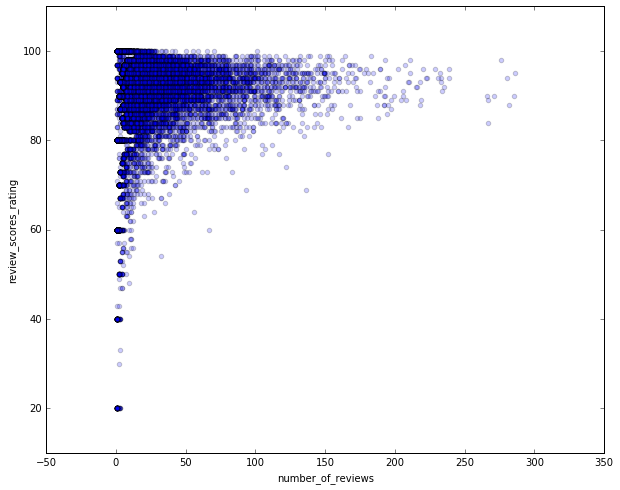

In [11]:
df.plot.scatter(x="number_of_reviews", y="review_scores_rating", figsize=(10, 8), alpha=0.2)

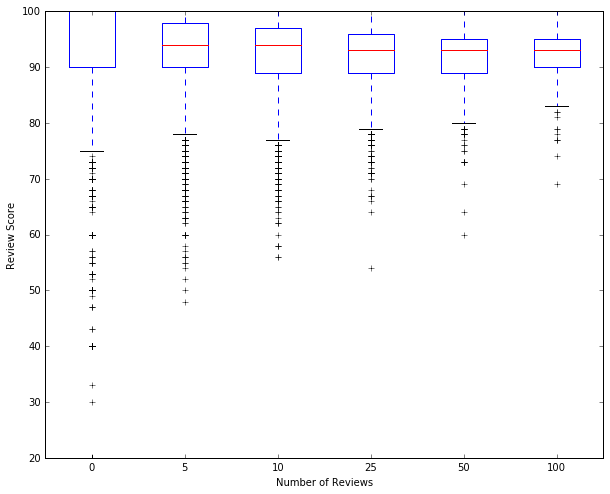

In [12]:
bins = [0, 5, 10, 25, 50, 100, 350]
boxplot_vecs = []

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(1, 7):
    lb = bins[i-1]
    ub = bins[i]
    foo = df["review_scores_rating"][df["number_of_reviews"].apply(lambda x: lb <= x <= ub)].dropna()
    boxplot_vecs.append(foo.values)
    
ax.boxplot(boxplot_vecs, labels=bins[:-1])
ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Review Score")
plt.show()

Better reviews also are correlated with higher prices

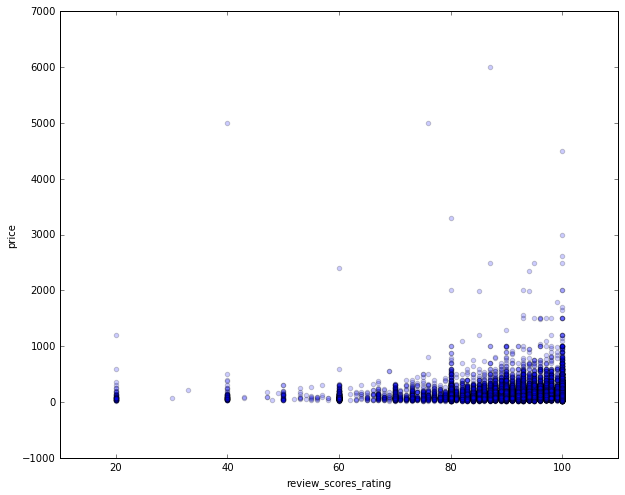

In [13]:
df.plot.scatter(x="review_scores_rating", y="price", figsize=(10, 8), alpha=0.2)

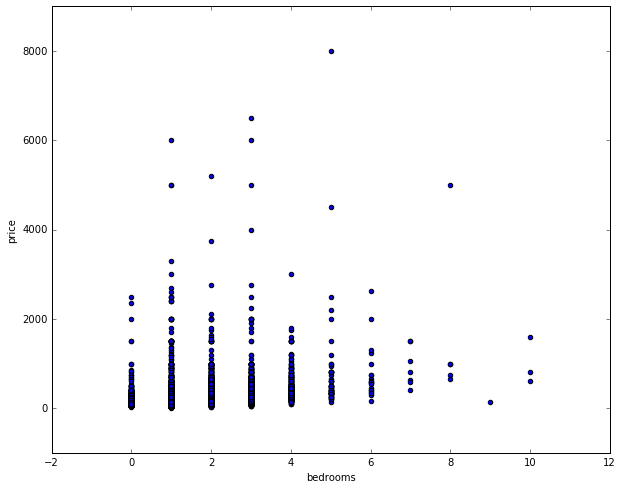

In [14]:
df.plot.scatter(x="bedrooms", y="price", figsize=(10, 8))

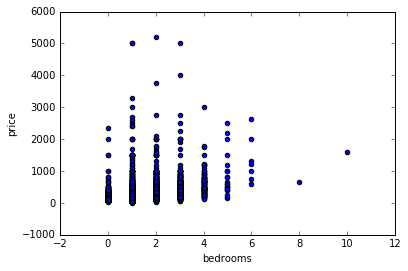

In [17]:
df[df["city"] == "New York"].plot.scatter(x="bedrooms", y="price")

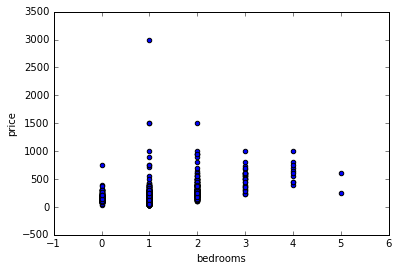

In [16]:
df[df["neighbourhood"] == "Upper West Side"].plot.scatter(x="bedrooms", y="price")